# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [195]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
last = a[-3:]
# reverse the list
reverse = a[::-1]
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
squared_numbers = [val ** 2 for val in a]
print(squared_numbers)

[1, 4, 9, 16, 25, 36]


In [196]:
# create a numpy array from this list
import numpy as np
b = np.array(a)

In [197]:
# find the mean of b
np.mean(b)

3.5

In [198]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [199]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2, 3)
print(b)

[[1 2 3]
 [4 5 6]]


In [200]:
# find the mean value of each row
row_means = np.mean(b,axis=1)
print(row_means)

[2. 5.]


In [201]:
# find the mean value of each column
col_means = np.mean(b,axis=0)
print(col_means)

[2.5 3.5 4.5]


In [202]:
# find the third column of b
col_means[2]

4.5

In [203]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')


In [204]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

201.0772727272727

In [205]:
# how many different categories of beverages are there?
#print(df.head())
distincts = df['beverage_category'].unique()
distincts.size

9

In [206]:
# what is the average # calories for each beverage category?
bev_cats = df.groupby('beverage_category')
bev_cats['calories'].mean()

beverage_category
classic espresso drinks             140.172414
coffee                                4.250000
frappuccino blended coffee          276.944444
frappuccino blended crme            233.076923
frappuccino light blended coffee    162.500000
shaken iced beverages               110.769231
signature espresso drinks           250.000000
smoothies                           282.500000
tazo tea drinks                     206.666667
Name: calories, dtype: float64

In [207]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep')['sugars'].mean().idxmax()


'Whole Milk'

In [208]:
# what is the average % daily value calcium content for each beverage?
df['calcium'].mean()

21.604545454545455

In [209]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
#protein to calorie ratio
df['protein/cals'] = df['protein'] / df['calories']
df.iloc[df['protein/cals'].idxmax()]['beverage']


'brewed coffee'

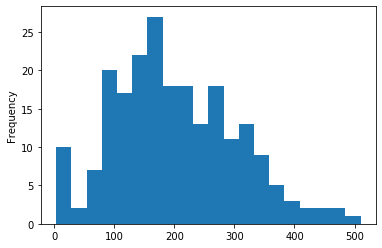

In [210]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['calories'].plot.hist(bins = 20)

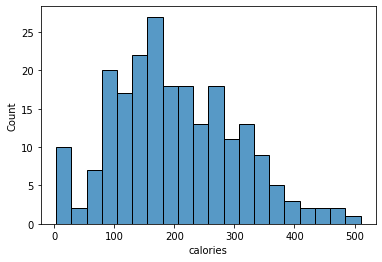

In [211]:
# plot the same distribution using seaborn. 
import seaborn as sns
sns.histplot(data = df, x = "calories", bins = 20)

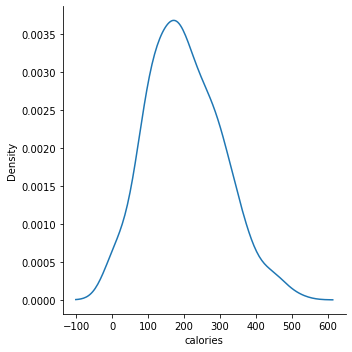

In [212]:
#what about a density plot instead?
sns.displot(data = df, x = 'calories', kind = "kde")

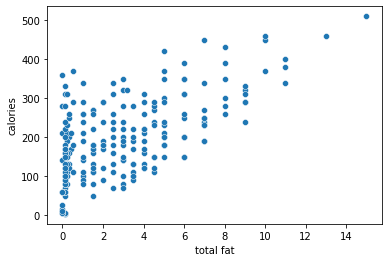

In [213]:
# plot calories against total fat using seaborn
sns.scatterplot(data = df, x = 'total fat', y = 'calories')

['Short' 'Tall' 'Grande' 'Venti']


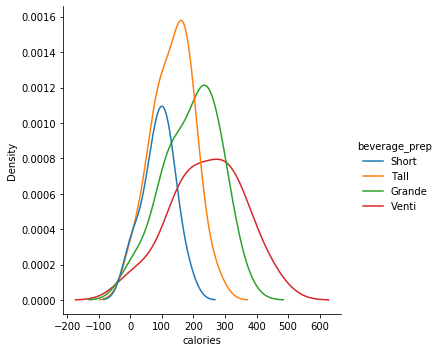

In [214]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
temp_df = df
temp_df['beverage_prep'] = temp_df['beverage_prep'].str.replace(' Nonfat Milk', '')

varies_index = df[(df['beverage_prep'] == '2% Milk') | (df['beverage_prep'] == 'Soymilk') | (df['beverage_prep'] == 'Solo') | (df['beverage_prep'] == 'Doppio') | (df['beverage_prep'] == 'Whole Milk')].index
df.drop(varies_index, inplace=True)

print(temp_df['beverage_prep'].unique())
sns.displot(data = temp_df, x = 'calories', kind = "kde", hue = 'beverage_prep')

